# **CARGA, LECTURA Y MANIPULACIÓN DE LOS DATOS**

## Importanción de librerias

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression

import scipy.stats as stats


## **Carga y lectura de los datos**

La fuente de datos es [Plataforma Nacional de Datos Abiertos de Colombia](https://www.datos.gov.co/).   Los datos utilizados para el proceso de aprendizaje fuerón: [RENDIEMIENTO DE CULTIVOS EN COLOMBIA](https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/RENDIMIENTO-DE-CULTIVOS-EN-COLOMBIA-POR-A-O/fgh5-rjkd)

In [ ]:
cultivosCol = pd.read_csv('https://github.com/LiliValGo/ML_Time_Series/blob/main/Data/Evaluaciones_Agropecuarias_Municipales_EVA.csv')
cultivosCol

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


## **Transformación de los datos**

### Renombrando columnas

In [89]:
cultivosCol.rename( columns = {'CÓD. \nDEP.': 'ID_departamento', 'DEPARTAMENTO': 'Departamento', 'CÓD. MUN.': 'ID_municipio', 'MUNICIPIO': 'Municipio', 'GRUPO \nDE CULTIVO': 'grupo_cultivo',
                   'SUBGRUPO \nDE CULTIVO': 'subgrupo_cultivo', 'CULTIVO': 'cultivo',
                   'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO': 'sistema_productivo', 'AÑO': 'año',
                   'PERIODO': 'periodo', 'Área Sembrada\n(ha)': 'area_sembrada(ha)', 'Área Cosechada\n(ha)': 'area_cosechada(ha)',
                   'Producción\n(t)': 'produccion(ton)', 'Rendimiento\n(t/ha)': 'rendimiento(ton/ha)', 'ESTADO FISICO PRODUCCION': 'estado_produccion',
                   'NOMBRE \nCIENTIFICO': 'nombre_cientifico', 'CICLO DE CULTIVO': 'ciclo_cultivo'}, inplace = True)


cultivosCol

,ID_departamento,Departamento,ID_municipio,Municipio,grupo_cultivo,subgrupo_cultivo,cultivo,sistema_productivo,año,periodo,area_sembrada(ha),area_cosechada(ha),produccion(ton),rendimiento(ton/ha),estado_produccion,nombre_cientifico,ciclo_cultivo
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


###  Información de los datos

In [90]:
# Tipo de Datos y cantidad

cultivosCol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID_departamento      206068 non-null  int64  
 1   Departamento         206068 non-null  object 
 2   ID_municipio         206068 non-null  int64  
 3   Municipio            206067 non-null  object 
 4   grupo_cultivo        206068 non-null  object 
 5   subgrupo_cultivo     206068 non-null  object 
 6   cultivo              206068 non-null  object 
 7   sistema_productivo   206068 non-null  object 
 8   año                  206068 non-null  int64  
 9   periodo              206068 non-null  object 
 10  area_sembrada(ha)    206068 non-null  int64  
 11  area_cosechada(ha)   206068 non-null  int64  
 12  produccion(ton)      206068 non-null  int64  
 13  rendimiento(ton/ha)  202635 non-null  float64
 14  estado_produccion    206068 non-null  object 
 15  nombre_cientifico

In [91]:
cultivosCol['cultivo'].value_counts()

MAIZ         24965
FRIJOL       14693
TOMATE        9654
YUCA          9488
PLATANO       9048
             ...  
CANYARANA        1
CALENDULA        1
MORINGA          1
BORE             1
LAUREL           1
Name: cultivo, Length: 223, dtype: int64

In [92]:
# Validación y conteo de valores Nulos

cultivosCol.isna().any()

ID_departamento        False
Departamento           False
ID_municipio           False
Municipio               True
grupo_cultivo          False
subgrupo_cultivo       False
cultivo                False
sistema_productivo     False
año                    False
periodo                False
area_sembrada(ha)      False
area_cosechada(ha)     False
produccion(ton)        False
rendimiento(ton/ha)     True
estado_produccion      False
nombre_cientifico       True
ciclo_cultivo          False
dtype: bool

In [93]:
cultivosCol_maiz = cultivosCol[cultivosCol['cultivo'] == 'MAIZ']
cultivosCol_maiz


,ID_departamento,Departamento,ID_municipio,Municipio,grupo_cultivo,subgrupo_cultivo,cultivo,sistema_productivo,año,periodo,area_sembrada(ha),area_cosechada(ha),produccion(ton),rendimiento(ton/ha),estado_produccion,nombre_cientifico,ciclo_cultivo
104346,5,ANTIOQUIA,5051,ARBOLETES,CEREALES,MAIZ,MAIZ,MAIZ TECNIFICADO,2006,2006B,4800,4650,11625,2.50,GRANO SECO,ZEA MAYS,TRANSITORIO
104347,5,ANTIOQUIA,5101,CIUDAD BOLIVAR,CEREALES,MAIZ,MAIZ,MAIZ TECNIFICADO,2006,2006B,450,450,1350,3.00,GRANO SECO,ZEA MAYS,TRANSITORIO
104348,5,ANTIOQUIA,5842,URAMITA,CEREALES,MAIZ,MAIZ,MAIZ TECNIFICADO,2006,2006B,405,180,630,3.50,GRANO SECO,ZEA MAYS,TRANSITORIO
104349,5,ANTIOQUIA,5380,LA ESTRELLA,CEREALES,MAIZ,MAIZ,MAIZ TECNIFICADO,2006,2006B,3,3,12,4.00,GRANO SECO,ZEA MAYS,TRANSITORIO
104350,13,BOLIVAR,13442,MARIA LA BAJA,CEREALES,MAIZ,MAIZ,MAIZ TECNIFICADO,2006,2006B,2030,2030,7105,3.50,GRANO SECO,ZEA MAYS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129307,97,VAUPES,97666,TARAIRA,CEREALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2018,2018A,0,0,0,1.90,GRANO SECO,ZEA MAYS,TRANSITORIO
129308,99,VICHADA,99001,PUERTO CARREÑO,CEREALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2018,2018A,155,155,303,1.95,GRANO SECO,ZEA MAYS,TRANSITORIO
129309,99,VICHADA,99524,LA PRIMAVERA,CEREALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2018,2018A,70,70,175,2.50,GRANO SECO,ZEA MAYS,TRANSITORIO
129310,99,VICHADA,99773,CUMARIBO,CEREALES,MAIZ,MAIZ,MAIZ TRADICIONAL,2018,2018A,52,52,131,2.53,GRANO SECO,ZEA MAYS,TRANSITORIO


Text(0.5, 1.0, 'Producción Maiz por Sistema Productivo')

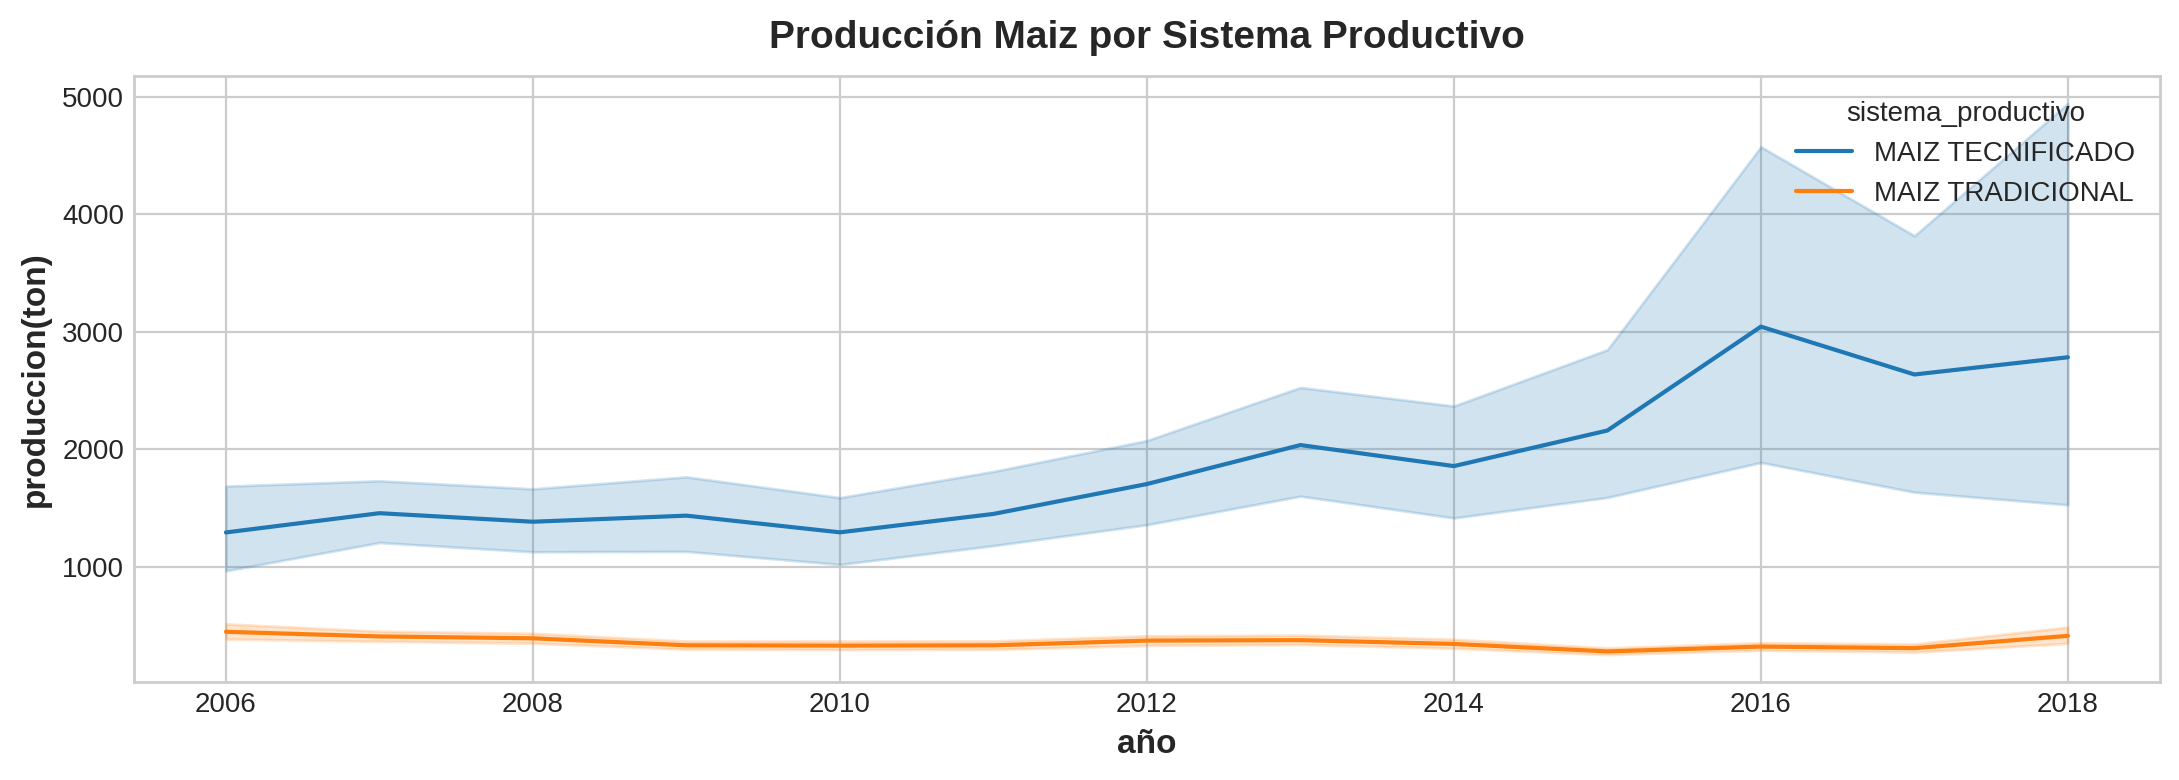

In [94]:
# Producción del Maiz por sistema productivo

sns.lineplot(x='año', y='produccion(ton)', data=cultivosCol_maiz, hue='sistema_productivo')
plt.title('Producción Maiz por Sistema Productivo')



In [95]:
# Total Producción Maiz como Datos de entrada

cultivosCol_maiz = cultivosCol[cultivosCol['cultivo'] == 'MAIZ']
cultivosCol_maiz = cultivosCol_maiz.groupby(['año', 'periodo']).sum()
cultivosCol_maiz = cultivosCol_maiz.drop(['ID_departamento', 'ID_municipio'], axis = 1)
cultivosCol_maiz


<ipython-input-95-ffeac318728a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cultivosCol_maiz = cultivosCol_maiz.groupby(['año', 'periodo']).sum()


area_sembrada(ha)  area_cosechada(ha)  produccion(ton)  \
año  periodo                                                           
2006 2006B               307588              290319           597258   
2007 2007A               343854              314177           713355   
     2007B               303614              278036           574422   
2008 2008A               330588              307077           701420   
     2008B               296396              268793           556666   
2009 2009A               322396              294848           675995   
     2009B               257135              224215           464594   
2010 2010A               328453              271757           595433   
     2010B               259722              216207           443222   
2011 2011A               339599              293854           632899   
     2011B               256908              229331           480230   
2012 2012A               335574              298540           727837   
     2012B               272238              247012           560871   
2013 2013A               338835              315641           802171   
     2013B               296913              281465           658212   
2014 2014A               316247              279367           688047   
     2014B               281205              250184           600507   
2015 2015A               311205              264697           716397   
     2015B               264980              229700           644038   
2016 2016A               350353              320479           985534   
     2016B               300906              278048           818368   
2017 2017A               343247              316195           884716   
     2017B               274656              252397           694297   
2018 2018A               378591              378558           966866   

              rendimiento(ton/ha)  
año  periodo                       
2006 2006B                1887.51  
2007 2007A                2093.15  
     2007B                1935.38  
2008 2008A                2112.87  
     2008B                1962.29  
2009 2009A                2121.93  
     2009B                1838.14  
2010 2010A                2086.34  
     2010B                1745.69  
2011 2011A                2067.90  
     2011B                1751.08  
2012 2012A                2121.48  
     2012B                1836.02  
2013 2013A                2270.99  
     2013B                1936.05  
2014 2014A                2121.21  
     2014B                1890.22  
2015 2015A                2288.94  
     2015B                1983.78  
2016 2016A                2229.05  
     2016B                2006.03  
2017 2017A                2257.56  
     2017B                1992.29  
2018 2018A                2293.72

# TRATAMIENTO: Regresión Lineaal con Series de Tiempo ([Kaggle Learn](https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series))

El algoritmo de regresión lineal aprende a hacer una suma ponderada a partir de sus características de entrada. Para dos características, tendríamos:



```
target = weight_1 * feature_1 + weight_2 * feature_2 + bias
```

Durante el entrenamiento, el algoritmo de regresión aprende los valores de los parámetros weight_1, weight_2 y bias que mejor se ajustan al objetivo. (Este algoritmo a menudo se denomina mínimos cuadrados ordinarios, ya que elige valores que minimizan el error al cuadrado entre el objetivo y las predicciones). Las ponderaciones también se denominan coeficientes de regresión y bias también se denomina intercepto porque indica dónde la función cruza el eje y.


## Serie de tiempo con caracteristicas de paso de tiempo - **TIME-STEP FEATURE**

Las características de paso de tiempo son características que podemos derivar directamente del índice de tiempo. La función de paso de tiempo más básica es el **time dummy** que cuenta los pasos de tiempo de la serie de principio a fin.

La regresión lineal con la variable **time dummy**  produce el modelo:



```
target = weight * time + bias
```
La simulación de **time dummy**  nos permite ajustar curvas a series de tiempo en un gráfico de tiempo, donde el tiempo forma el eje x.

Las funciones de paso de tiempo le permiten modelar la dependencia del tiempo. Una serie depende del tiempo si sus valores pueden predecirse desde el momento en que ocurrieron.



### Tranformación del dataset

In [96]:
# Se construye el index a partir del año

cultivosCol_maiz['index_año'] = np.arange(len(cultivosCol_maiz.index))
cultivosCol_maiz.head(24)

area_sembrada(ha)  area_cosechada(ha)  produccion(ton)  \
año  periodo                                                           
2006 2006B               307588              290319           597258   
2007 2007A               343854              314177           713355   
     2007B               303614              278036           574422   
2008 2008A               330588              307077           701420   
     2008B               296396              268793           556666   
2009 2009A               322396              294848           675995   
     2009B               257135              224215           464594   
2010 2010A               328453              271757           595433   
     2010B               259722              216207           443222   
2011 2011A               339599              293854           632899   
     2011B               256908              229331           480230   
2012 2012A               335574              298540           727837   
     2012B               272238              247012           560871   
2013 2013A               338835              315641           802171   
     2013B               296913              281465           658212   
2014 2014A               316247              279367           688047   
     2014B               281205              250184           600507   
2015 2015A               311205              264697           716397   
     2015B               264980              229700           644038   
2016 2016A               350353              320479           985534   
     2016B               300906              278048           818368   
2017 2017A               343247              316195           884716   
     2017B               274656              252397           694297   
2018 2018A               378591              378558           966866   

              rendimiento(ton/ha)  index_año  
año  periodo                                  
2006 2006B                1887.51          0  
2007 2007A                2093.15          1  
     2007B                1935.38          2  
2008 2008A                2112.87          3  
     2008B                1962.29          4  
2009 2009A                2121.93          5  
     2009B                1838.14          6  
2010 2010A                2086.34          7  
     2010B                1745.69          8  
2011 2011A                2067.90          9  
     2011B                1751.08         10  
2012 2012A                2121.48         11  
     2012B                1836.02         12  
2013 2013A                2270.99         13  
     2013B                1936.05         14  
2014 2014A                2121.21         15  
     2014B                1890.22         16  
2015 2015A                2288.94         17  
     2015B                1983.78         18  
2016 2016A                2229.05         19  
     2016B                2006.03         20  
2017 2017A                2257.56         21  
     2017B                1992.29         22  
2018 2018A                2293.72         23

### Entrenamiento del modelo

In [97]:
from sklearn.linear_model import LinearRegression

# Training data
X_feature_1 = cultivosCol_maiz.loc[:, ['index_año']]  # features
y_target_1 = cultivosCol_maiz.loc[:, 'produccion(ton)']  # target

# Train the model
modelo_time_step = LinearRegression()
modelo_time_step.fit(X_feature_1, y_target_1)

# Store the fitted values as a time series with the same time index as
# the training data
y_produccion_pred_1 = pd.Series(modelo_time_step.predict(X_feature_1), index=X_feature_1.index)
y_produccion_pred_1

año   periodo
2006  2006B      537022.743333
2007  2007A      548960.457681
      2007B      560898.172029
2008  2008A      572835.886377
      2008B      584773.600725
2009  2009A      596711.315072
      2009B      608649.029420
2010  2010A      620586.743768
      2010B      632524.458116
2011  2011A      644462.172464
      2011B      656399.886812
2012  2012A      668337.601159
      2012B      680275.315507
2013  2013A      692213.029855
      2013B      704150.744203
2014  2014A      716088.458551
      2014B      728026.172899
2015  2015A      739963.887246
      2015B      751901.601594
2016  2016A      763839.315942
      2016B      775777.030290
2017  2017A      787714.744638
      2017B      799652.458986
2018  2018A      811590.173333
dtype: float64

### Visualización del modelo

<ipython-input-98-4dfdd4c5285a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time Plot of Production')

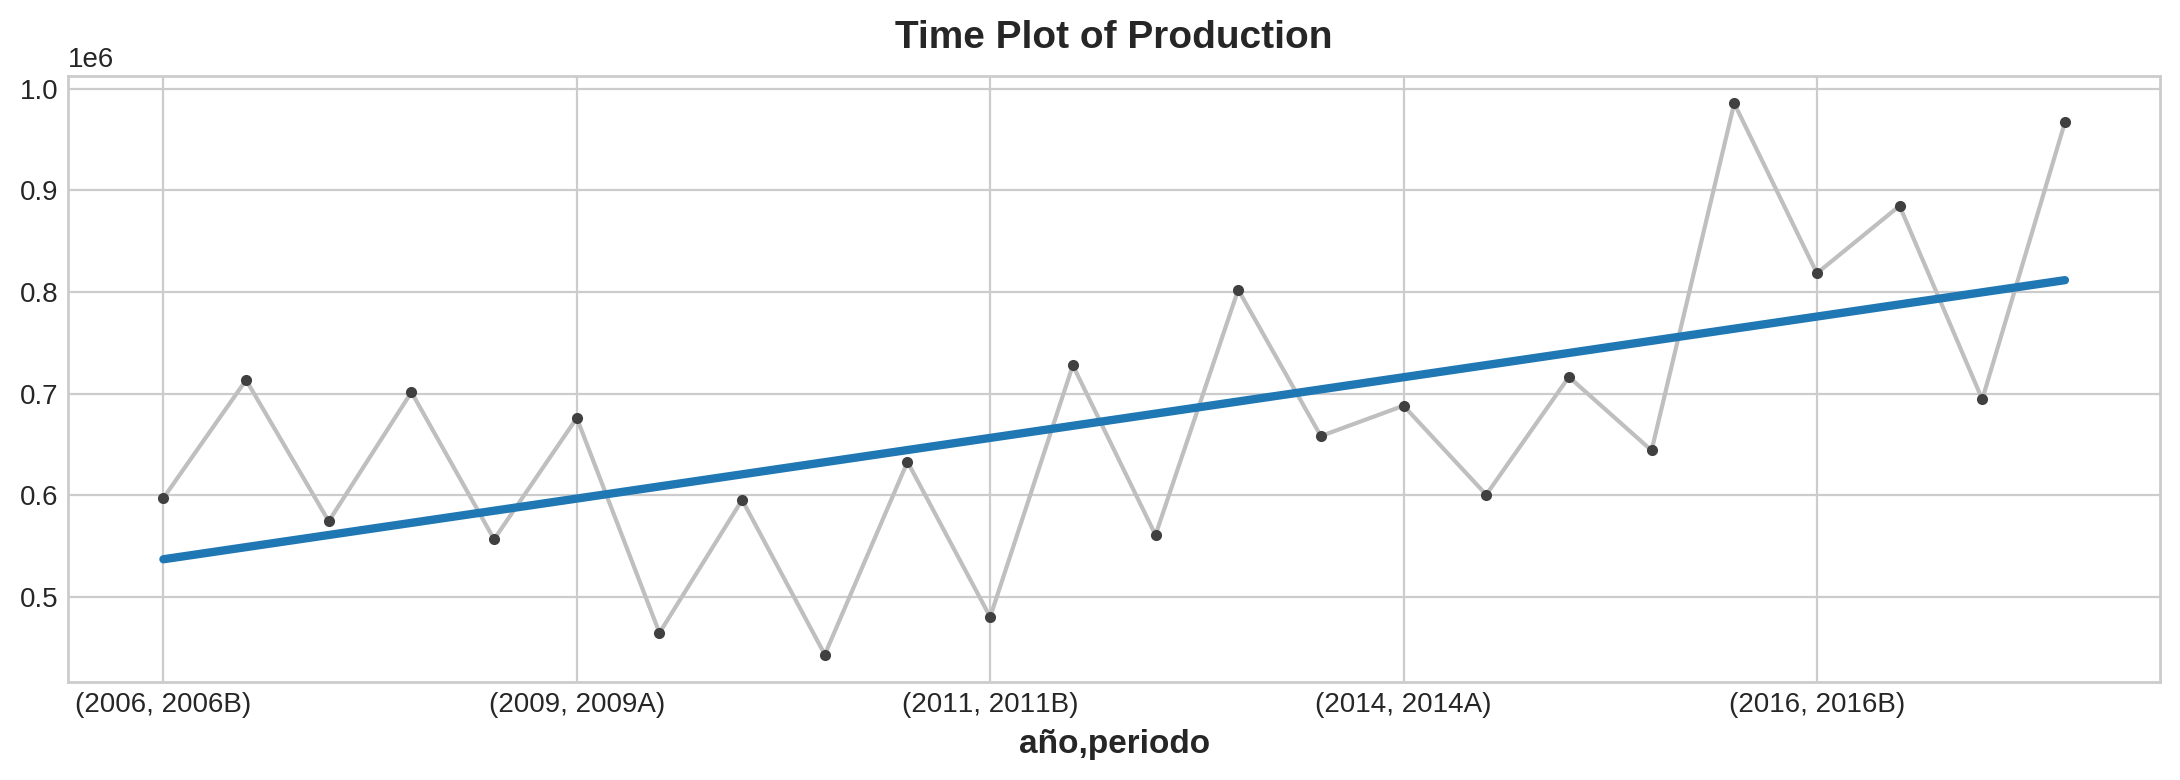

In [98]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


ax = y_target_1.plot(**plot_params)
ax = y_produccion_pred_1.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Production')

### Análisis del modelo a partir de la gráfica


*   Tendencia ascendente .
*   Variabilidad en los datos no capturados por el modelo ( Picos y valles en 2009, 2009A, 2014, 2014B y 2016, 2016B.
* Posibilidad de explorar modelos de series de tiempo como[ **ARIMA**](https://cienciadedatos.net/documentos/py51-modelos-arima-sarimax-python) y [**SARIMA** ](https://www.themachinelearners.com/series-temporales-arima/)


### Evaluación del modelo

1. **Coeficiente de Determinación (R²):** Mide la proporción de la varianza de la variable dependiente que es predecible a partir de las variables independientes. En términos simples, indica qué tan bien el modelo se ajusta a los datos. El valor de R² varía entre 0 y 1

*Donde*

*   Un valor de R² cercano a **1** indica que el modelo explica una gran proporción de la varianza en la variable dependiente.
*   Un valor de R² cercano a **0** sugiere que el modelo no explica bien la variabilidad de los datos; no se ajusta bien a ellos.



#### Métrica R cuadrado

In [99]:
# Métrica R cuadrado
from sklearn.metrics import r2_score

r2 = r2_score(y_target_1, y_produccion_pred_1)
print('Coeficiente de Determinación (R^2):', r2)


Coeficiente de Determinación (R^2): 0.3535519859556925


#### Error Cuadrático Medio (MSE) y Raíz del Error Cuadrático Medio (RMSE)

2. **Error Cuadrático Medio (MSE) y Raíz del Error Cuadrático Medio (RMSE):**
  Error Cuadrático Medio ***(MSE)*** es el promedio de los cuadrados de los errores, es decir, la media de las diferencias al cuadrado entre los valores observados reales y los valores predichos por el modelo.

  Raíz del Error Cuadrático Medio (RMSE): Es la raíz cuadrada del MSE y proporciona una medida de error en las mismas unidades que la variable dependiente.***texto en negrita***

In [100]:
# Métrica Error Cuadrático Medio (MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_target_1, y_produccion_pred_1)
print('Error Cuadrático Medio (MSE): ', mse)

Error Cuadrático Medio (MSE):  12485596293.421732


In [101]:
# Métrica Raíz del Error Cuadrático Medio (RMSE)

rmse = np.sqrt(mse)
print('Raíz del Error Cuadrático Medio (RMSE):', rmse)

Raíz del Error Cuadrático Medio (RMSE): 111738.96497382519


#### Media de variable dependiente

In [102]:
# Media de variable dependiente

cultivosCol_maiz['produccion(ton)'].mean()

674306.4583333334

#### Proporción del RMSE con Respecto a la Media


In [103]:
# Proporción del RMSE con Respecto a la Media

(rmse/cultivosCol_maiz['produccion(ton)'].mean())*100



16.570946873326356

NOTA: Un RMSE del **16.57%** implica que las predicciones del modelo están variando en más o menos **111,738.96 toneladas** de la producción real.

#### Error Absoluto Medio (MAE)

3. **Error Absoluto Medio (MAE):** El MAE mide el promedio de los errores absolutos (las diferencias entre los valores predichos y los reales, sin considerar la dirección). Es una medida más robusta que el MSE frente a los valores atípicos y te da una mejor idea del error típico en términos absolutos.

In [104]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_target_1, y_produccion_pred_1)
print('Error Absoluto Medio (MAE):', mae)

Error Absoluto Medio (MAE): 94336.79419082125


NOTA: El MAE indica que en promedio las predicciones del modelo se desvían aproximadamente 94,336 toneladas de los valores reales.

#### Análisis de Residuos

4. **Análisis de Residuos:** Los residuos son la diferencia entre los valores observados y los predichos. Analizar los residuos ayuda a entender si hay patrones no capturados por el modelo.

##### Calculando el Residuo



In [105]:
# 1. Calculando el Residuo

residuos_time_step_feature_Maiz = y_target_1 - y_produccion_pred_1
residuos_time_step_feature_Maiz

año   periodo
2006  2006B       60235.256667
2007  2007A      164394.542319
      2007B       13523.827971
2008  2008A      128584.113623
      2008B      -28107.600725
2009  2009A       79283.684928
      2009B     -144055.029420
2010  2010A      -25153.743768
      2010B     -189302.458116
2011  2011A      -11563.172464
      2011B     -176169.886812
2012  2012A       59499.398841
      2012B     -119404.315507
2013  2013A      109957.970145
      2013B      -45938.744203
2014  2014A      -28041.458551
      2014B     -127519.172899
2015  2015A      -23566.887246
      2015B     -107863.601594
2016  2016A      221694.684058
      2016B       42590.969710
2017  2017A       97001.255362
      2017B     -105355.458986
2018  2018A      155275.826667
dtype: float64

##### Análisis Visual

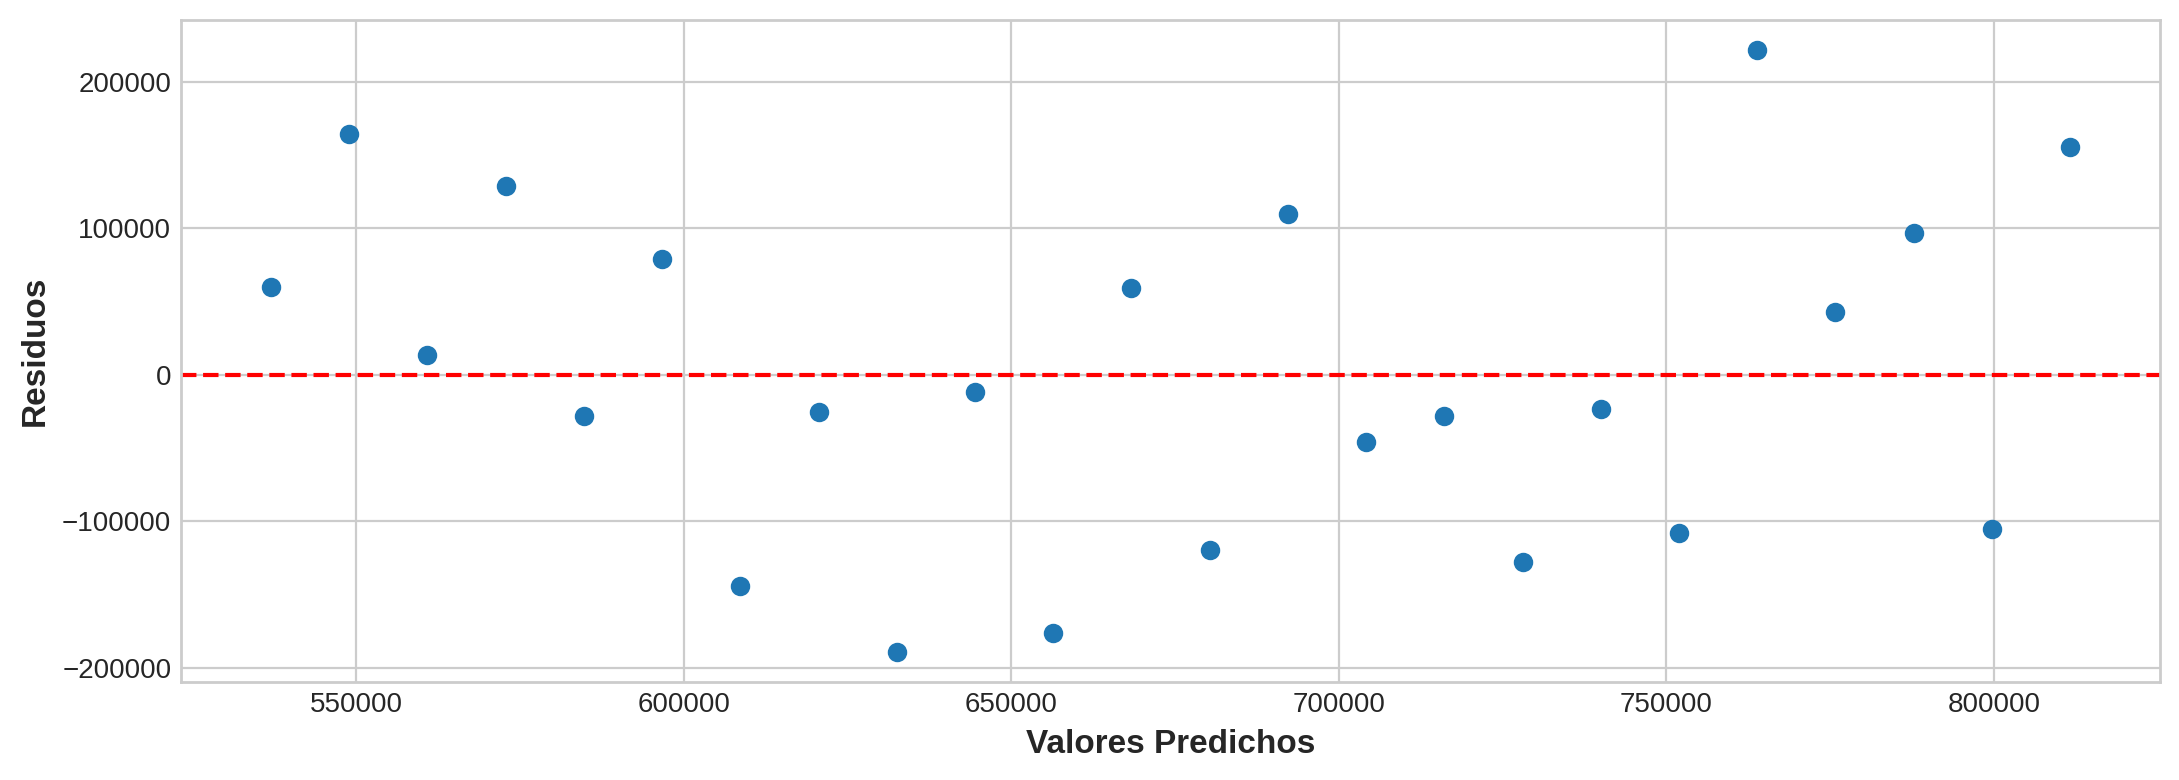

In [106]:
# Gráfico de Residuos

plt.scatter(y_produccion_pred_1, residuos_time_step_feature_Maiz)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

**Interpretación**

*   Los residuos no estan distribuidos aleatoriamente alrededor de la línea roja horizontal que representa el residuo cero.

*   Presencia de valores atípicos en los extremos de la gráfica.


---



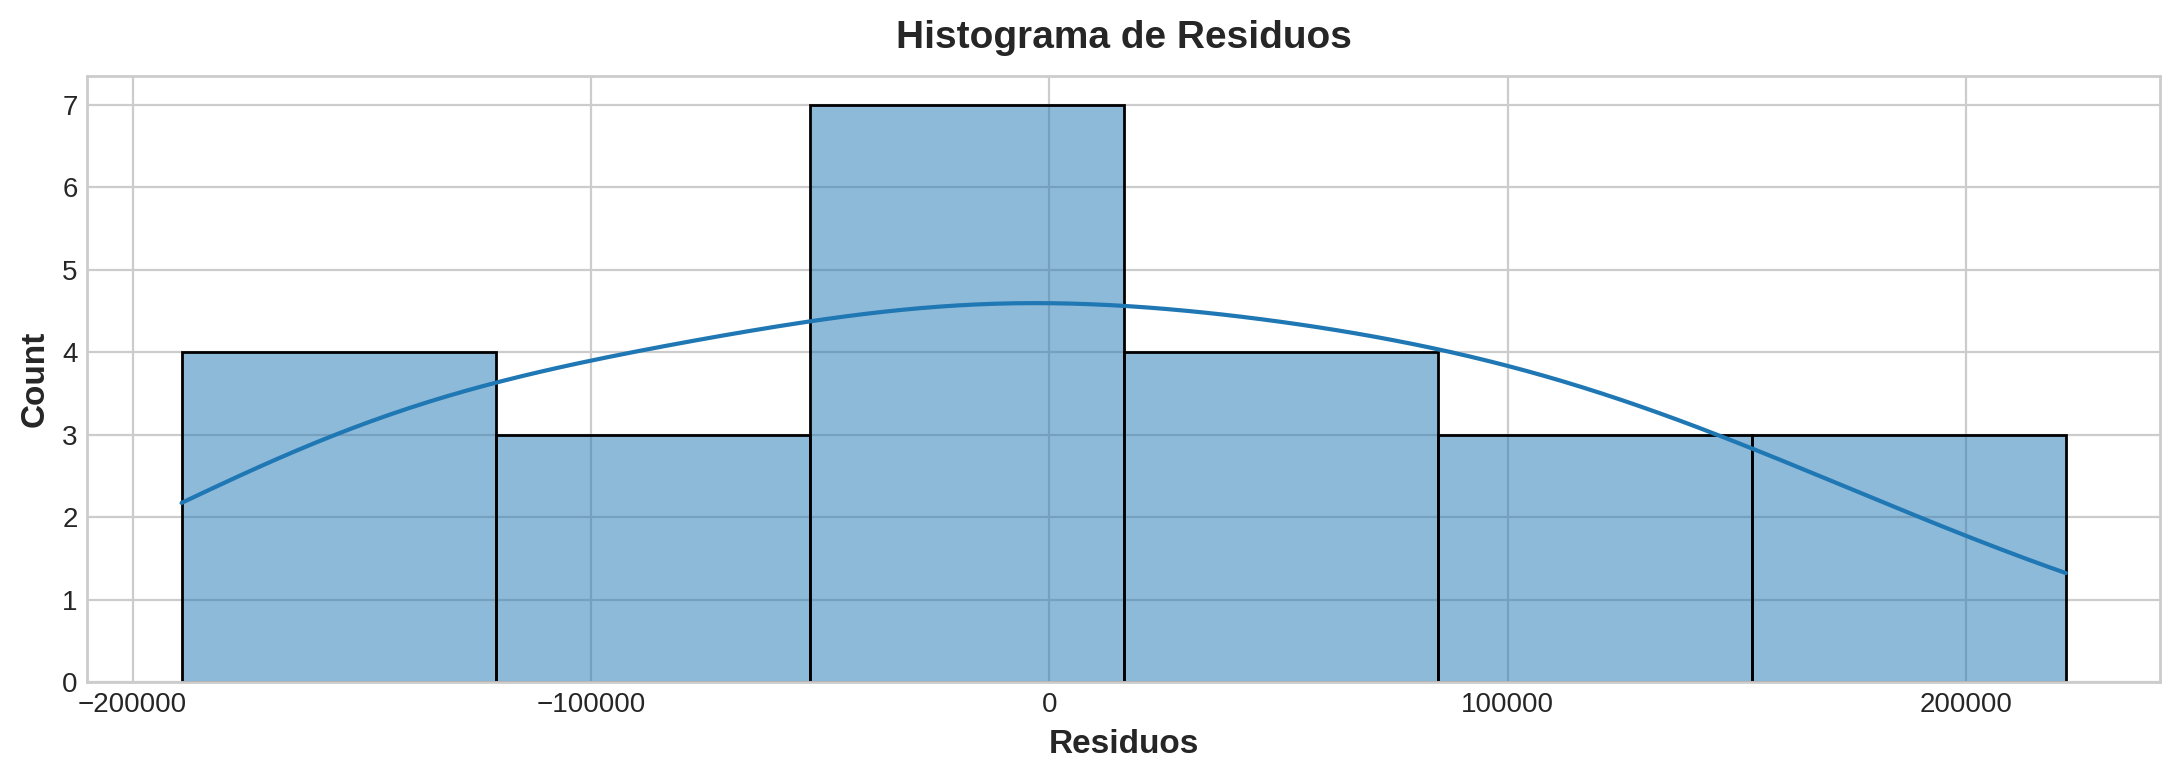

In [107]:
# Histograma de residuos

sns.histplot(residuos_time_step_feature_Maiz, kde=True)
plt.xlabel('Residuos')
plt.title('Histograma de Residuos')
plt.show()

**Interpretación**


*   La distribución de los residuos no parece ser simétrica alrededor de cero. Hay una cola más larga que se extiende hacia la derecha, lo que sugiere una distribución sesgada positivamente.


---




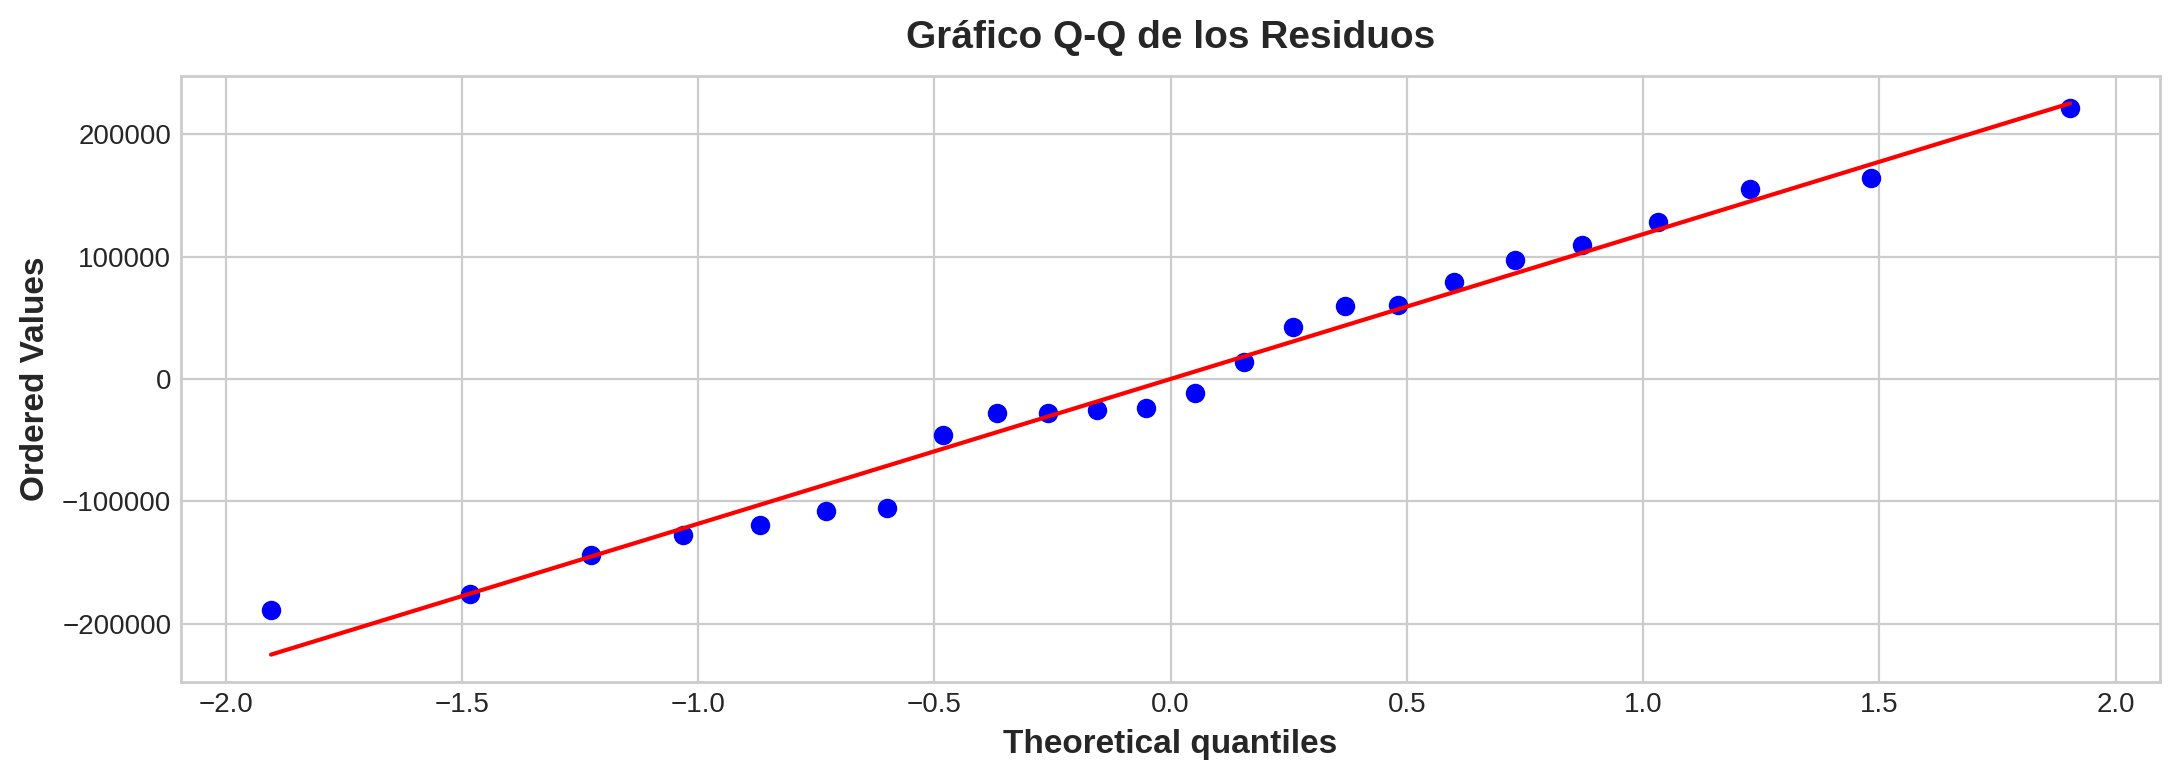

In [108]:
# Gráfico Q-Q (Quantile-Quantile)

stats.probplot(residuos_time_step_feature_Maiz, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuos')
plt.show()

**Intrepretación**



*   Los puntos siguen aproximadamente la línea roja, lo que indica que los residuos tienen una tendencia a distribuirse normalmente.

*   Los puntos en los extremos del gráfico (los valores más altos y más bajos de los residuos) parecen alejarse de la línea, lo que indica la presencia de colas más pesadas en comparación con una distribución normal. Esto puede ser un signo de valores atípicos o de un exceso de [kurtosis](https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,(thin%20tails)%20are%20platykurtic.) en la distribución de los residuos.



---





##### Análisis Cuantitativo

In [109]:
# Media de los Residuos

media_residuos_time_step_feature_Maiz = np.mean(residuos_time_step_feature_Maiz)
media_residuos_time_step_feature_Maiz

-3.8805107275644936e-11

In [110]:
# Prueba de normalidad (Shapiro-Wilk)

from scipy.stats import shapiro
stat, p = shapiro(residuos_time_step_feature_Maiz)
print('Estadística de la prueba de Shapiro-Wilk:', stat)
print('P-valor de la prueba de Shapiro-Wilk:', p)

Estadística de la prueba de Shapiro-Wilk: 0.9716021418571472
P-valor de la prueba de Shapiro-Wilk: 0.7066121101379395


**Interpretación**

*   La media de los residuos es muy cercana a cero (-3.8805107275644936e-11), lo que es esperado en un modelo bien ajustado. Esto indica que no hay un sesgo sistemático en las predicciones del modelo; no están sobreestimando ni subestimando consistentemente la variable dependiente.

*   La estadística de la prueba se acerca a 1, lo que sugiere que los datos de los residuos se distribuyen de manera similar a una distribución normal.

*   El p-valor es mayor que el nivel de significancia típico de 0.05, lo que significa que no rechazamos la hipótesis nula de que los residuos están normalmente distribuidos. En otras palabras, no hay evidencia estadística suficiente para afirmar que los residuos no siguen una distribución normal.



## Serie de tiempo con funciones de paso de tiempo - **LAG FEATURE**

Para crear una característica de retraso, cambiamos las observaciones de la serie objetivo para que parezcan haber ocurrido más tarde en el tiempo.

La regresión lineal con una característica de retraso produce el modelo:



```
target = weight * lag + bias
```



### Tranformación del dataset

In [111]:
cultivosCol_maiz['Lag_1'] = cultivosCol_maiz['produccion(ton)'].shift(1)
cultivosCol_maiz.head(25)


area_sembrada(ha)  area_cosechada(ha)  produccion(ton)  \
año  periodo                                                           
2006 2006B               307588              290319           597258   
2007 2007A               343854              314177           713355   
     2007B               303614              278036           574422   
2008 2008A               330588              307077           701420   
     2008B               296396              268793           556666   
2009 2009A               322396              294848           675995   
     2009B               257135              224215           464594   
2010 2010A               328453              271757           595433   
     2010B               259722              216207           443222   
2011 2011A               339599              293854           632899   
     2011B               256908              229331           480230   
2012 2012A               335574              298540           727837   
     2012B               272238              247012           560871   
2013 2013A               338835              315641           802171   
     2013B               296913              281465           658212   
2014 2014A               316247              279367           688047   
     2014B               281205              250184           600507   
2015 2015A               311205              264697           716397   
     2015B               264980              229700           644038   
2016 2016A               350353              320479           985534   
     2016B               300906              278048           818368   
2017 2017A               343247              316195           884716   
     2017B               274656              252397           694297   
2018 2018A               378591              378558           966866   

              rendimiento(ton/ha)  index_año     Lag_1  
año  periodo                                            
2006 2006B                1887.51          0       NaN  
2007 2007A                2093.15          1  597258.0  
     2007B                1935.38          2  713355.0  
2008 2008A                2112.87          3  574422.0  
     2008B                1962.29          4  701420.0  
2009 2009A                2121.93          5  556666.0  
     2009B                1838.14          6  675995.0  
2010 2010A                2086.34          7  464594.0  
     2010B                1745.69          8  595433.0  
2011 2011A                2067.90          9  443222.0  
     2011B                1751.08         10  632899.0  
2012 2012A                2121.48         11  480230.0  
     2012B                1836.02         12  727837.0  
2013 2013A                2270.99         13  560871.0  
     2013B                1936.05         14  802171.0  
2014 2014A                2121.21         15  658212.0  
     2014B                1890.22         16  688047.0  
2015 2015A                2288.94         17  600507.0  
     2015B                1983.78         18  716397.0  
2016 2016A                2229.05         19  644038.0  
     2016B                2006.03         20  985534.0  
2017 2017A                2257.56         21  818368.0  
     2017B                1992.29         22  884716.0  
2018 2018A                2293.72         23  694297.0

### Entrenamiento del modelo

In [112]:
X_feature_2 = cultivosCol_maiz.loc[:, ['Lag_1']]
X_feature_2.dropna(inplace=True)
y_target_2 = cultivosCol_maiz.loc[:, 'produccion(ton)']
y_target_2, X_feature_2 = y_target_2.align(X_feature_2, join='inner')
model_leg_feature = LinearRegression()
model_leg_feature.fit(X_feature_2, y_target_2)

y_produccion_pred_2 = pd.Series(model_leg_feature.predict(X_feature_2), index=X_feature_2.index)
y_produccion_pred_2

año   periodo
2007  2007A      664397.037746
      2007B      688326.892947
2008  2008A      659690.092921
      2008B      685866.856754
2009  2009A      656030.235139
      2009B      680626.268552
2010  2010A      637052.400845
      2010B      664020.869665
2011  2011A      632647.214963
      2011B      671743.342726
2012  2012A      640275.285294
      2012B      691311.915497
2013  2013A      656896.967622
      2013B      706633.602160
2014  2014A      676960.845544
      2014B      683110.420726
2015  2015A      665066.719991
      2015B      688953.908455
2016  2016A      674039.307799
      2016B      744428.291421
2017  2017A      709972.119647
      2017B      723647.736009
2018  2018A      684398.667580
dtype: float64

### Visualización del modelo

<ipython-input-113-3ff87f161ccb>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0.5, 1.0, 'Time Plot of Production')

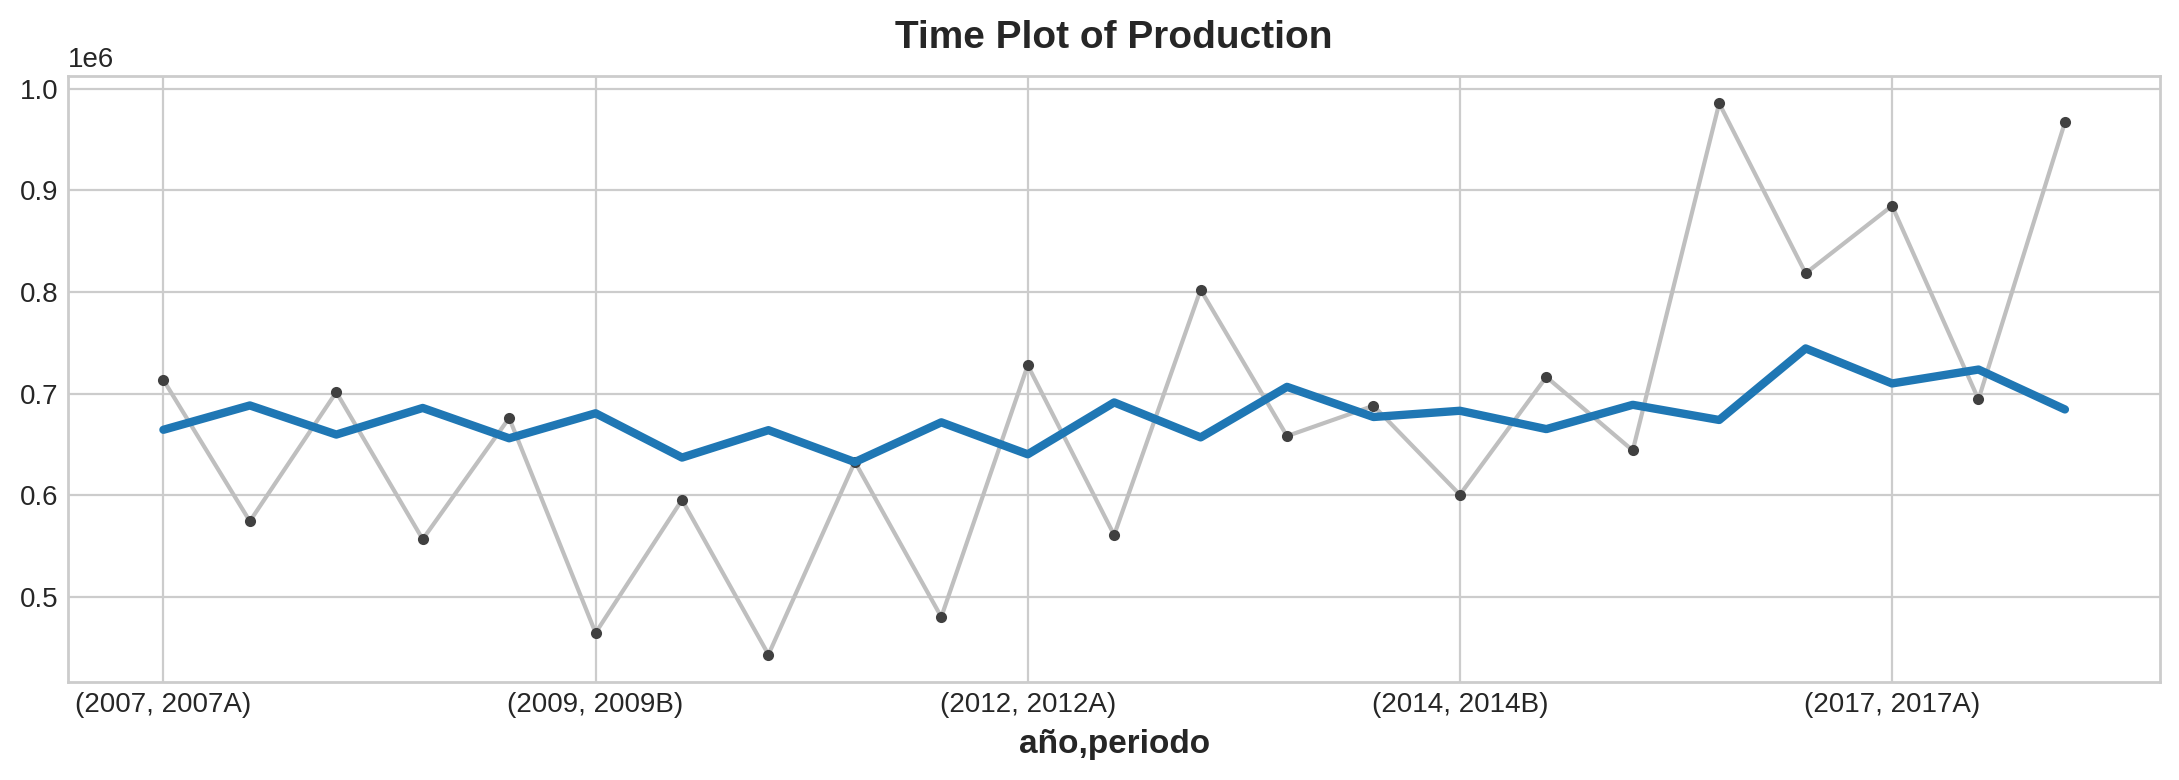

In [113]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


ax = y_target_2.plot(**plot_params)
ax = y_produccion_pred_2.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Production')

### Análisis del modelo a partir de la gráfica


*   Tendencia al incremento de la producción a lo largo del tiempo
*   Tanto en Time-Step-Feature como Lag-Feature presentan fluctuaciones temporales significativas
*   Es necesario investigar los factores que causarón las fluctuaciones temporales mas notables



In [114]:
### Evaluación del modelo

#### Métrica R cuadrado

In [115]:
# Métrica R cuadrado
from sklearn.metrics import r2_score

r2 = r2_score(y_target_2, y_produccion_pred_2)
print('Coeficiente de Determinación (R^2):', r2)

Coeficiente de Determinación (R^2): 0.034763981521311216


#### Error Cuadrático Medio (MSE) y Raíz del Error Cuadrático Medio (RMSE)

In [116]:
# Métrica Error Cuadrático Medio (MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_target_2, y_produccion_pred_2)
print('Error Cuadrático Medio (MSE): ', mse)

Error Cuadrático Medio (MSE):  19193303443.18336


In [117]:
# Métrica Raíz del Error Cuadrático Medio (RMSE)

rmse = np.sqrt(mse)
print('Raíz del Error Cuadrático Medio (RMSE):', rmse)

Raíz del Error Cuadrático Medio (RMSE): 138539.89838015387


#### Media de variable dependiente

In [118]:
# Media de variable dependiente

cultivosCol_maiz['produccion(ton)'].mean()

674306.4583333334

#### Proporción del RMSE con Respecto a la Media

In [119]:
(rmse/cultivosCol_maiz['produccion(ton)'].mean())*100

20.545539297158673

#### Error Absoluto Medio (MAE)

In [120]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_target_2, y_produccion_pred_2)
print('Error Absoluto Medio (MAE):', mae)

Error Absoluto Medio (MAE): 108591.49689873858


#### Análisis de Residuos

##### Calculando el Residuo


In [121]:
# 1. Calculando el Residuo

residuos_lag_feature = y_target_2 - y_produccion_pred_2
residuos_lag_feature

año   periodo
2007  2007A       48957.962254
      2007B     -113904.892947
2008  2008A       41729.907079
      2008B     -129200.856754
2009  2009A       19964.764861
      2009B     -216032.268552
2010  2010A      -41619.400845
      2010B     -220798.869665
2011  2011A         251.785037
      2011B     -191513.342726
2012  2012A       87561.714706
      2012B     -130440.915497
2013  2013A      145274.032378
      2013B      -48421.602160
2014  2014A       11086.154456
      2014B      -82603.420726
2015  2015A       51330.280009
      2015B      -44915.908455
2016  2016A      311494.692201
      2016B       73939.708579
2017  2017A      174743.880353
      2017B      -29350.736009
2018  2018A      282467.332420
dtype: float64

##### Análisis Visual

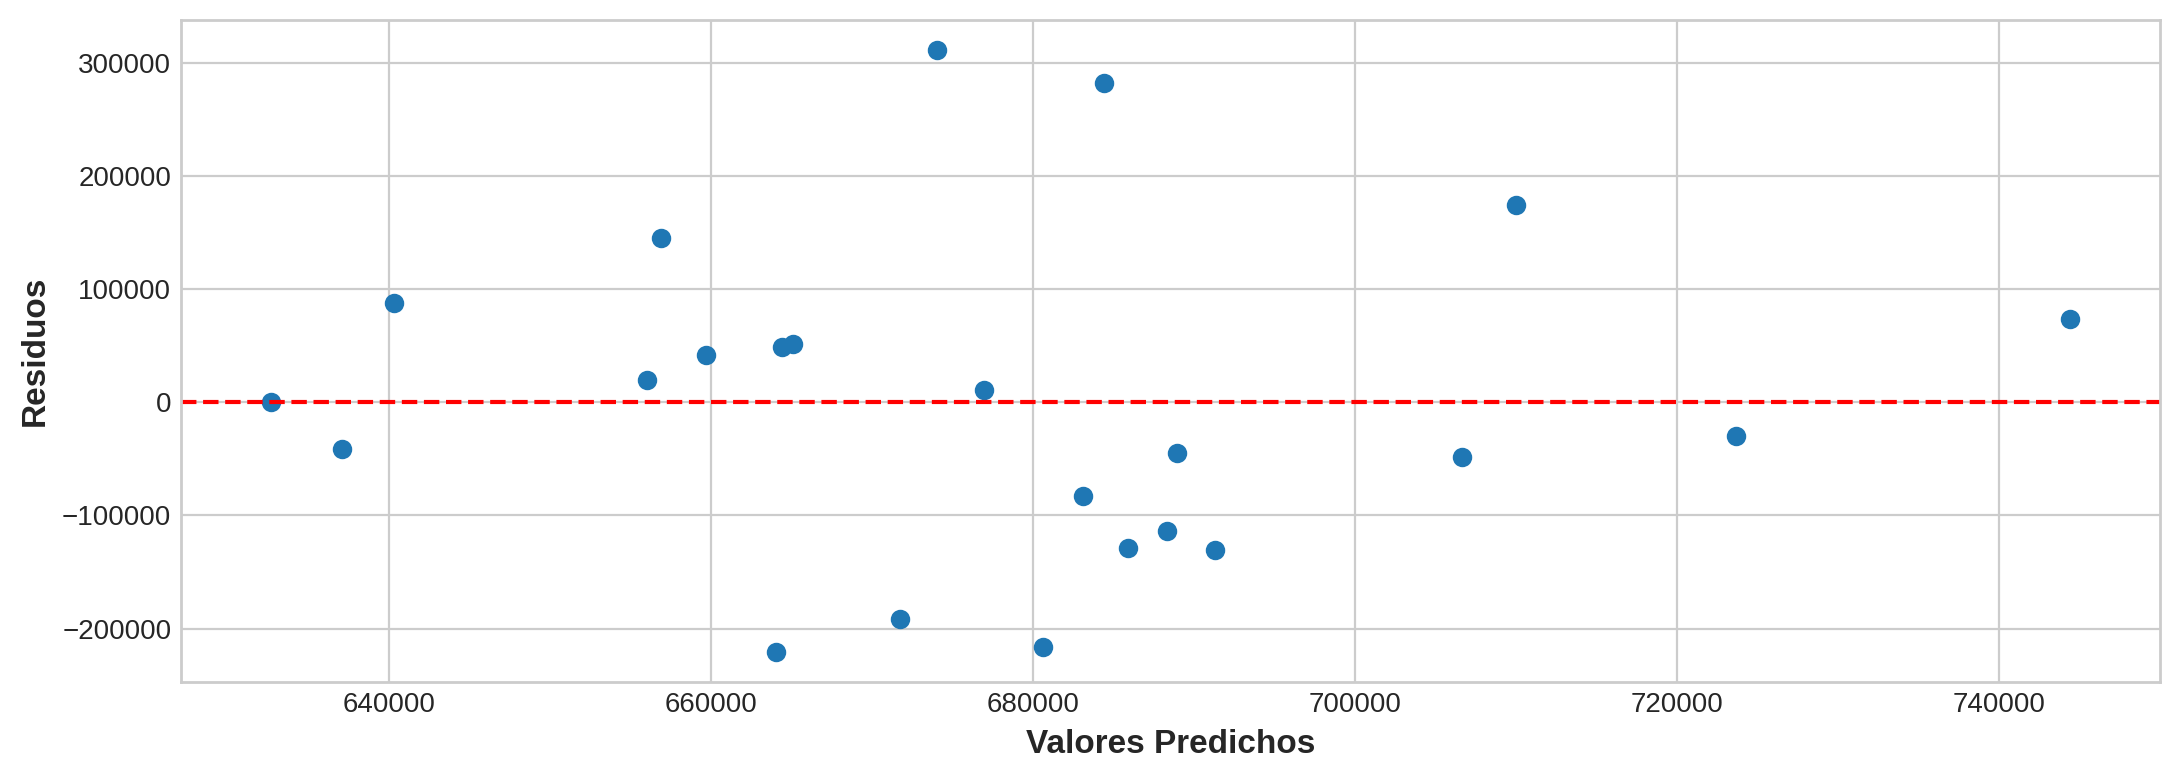

In [122]:
# Gráfico de Residuos

plt.scatter(y_produccion_pred_2, residuos_lag_feature)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()

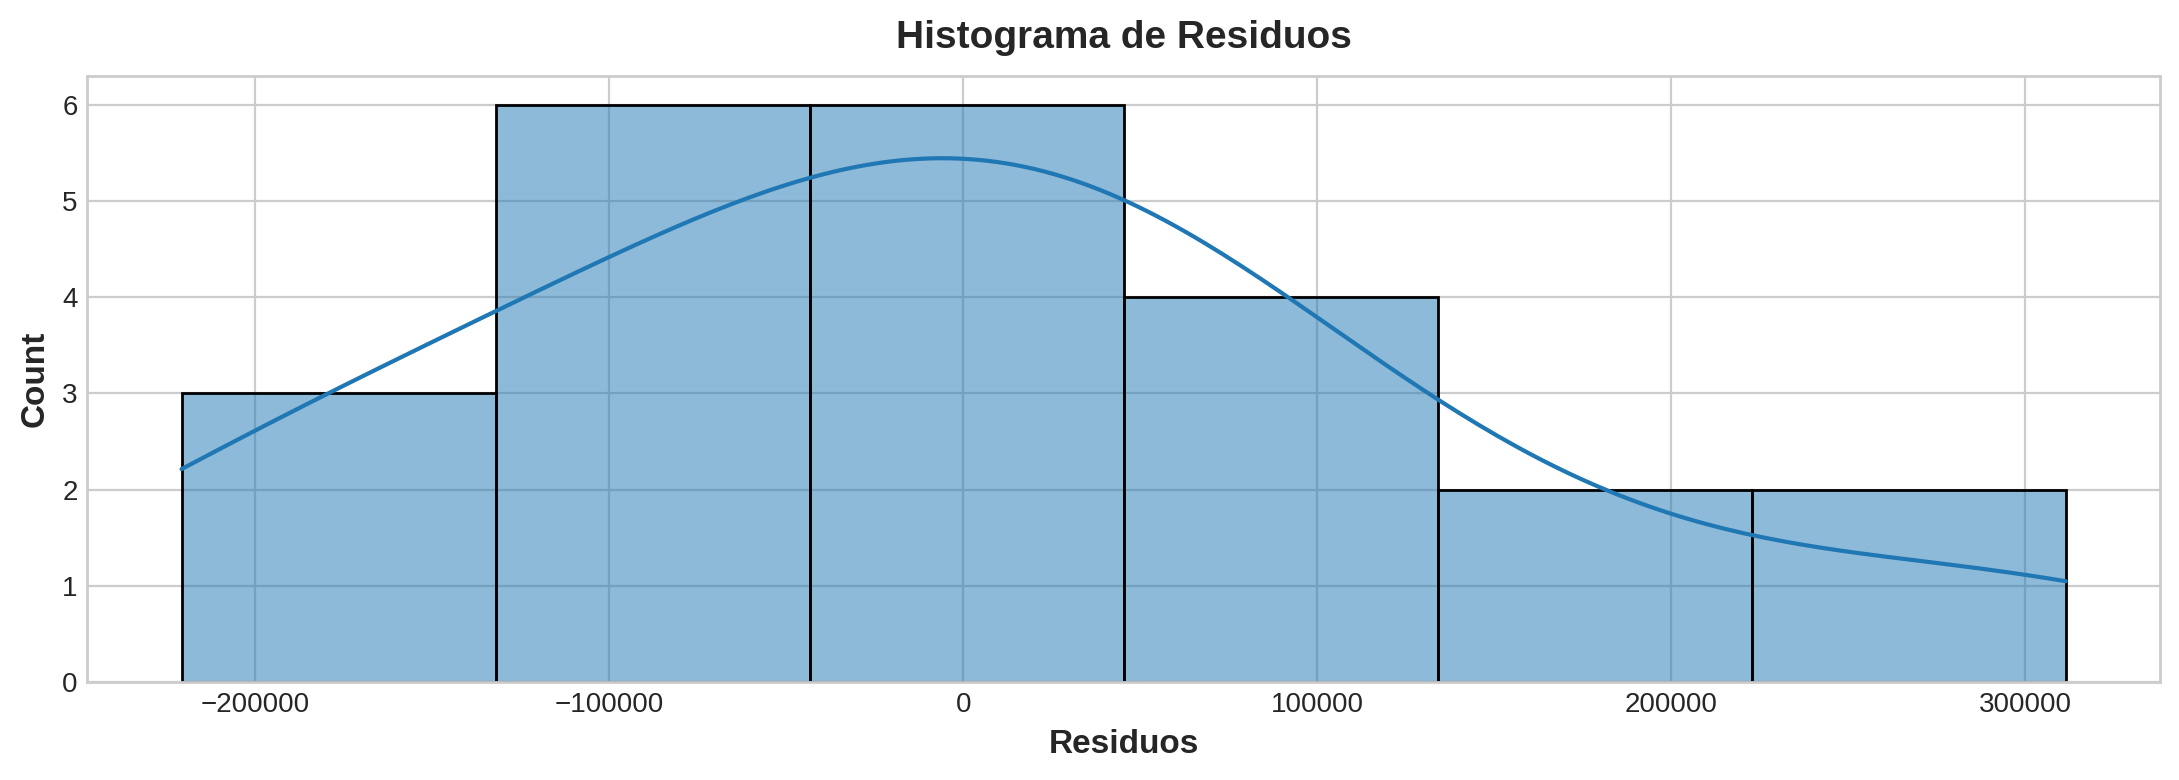

In [123]:
# Histograma de residuos

sns.histplot(residuos_lag_feature, kde=True)
plt.xlabel('Residuos')
plt.title('Histograma de Residuos')
plt.show()

##### Análisis Cuantitativo

In [124]:
# Media de los Residuos

media_lag_feature = np.mean(residuos_lag_feature)
media_lag_feature

5.567689304766448e-11

In [125]:
# Prueba de normalidad (Shapiro-Wilk)

from scipy.stats import shapiro
stat, p = shapiro(residuos_lag_feature)
print('Estadística de la prueba de Shapiro-Wilk:', stat)
print('P-valor de la prueba de Shapiro-Wilk:', p)

Estadística de la prueba de Shapiro-Wilk: 0.9637089371681213
P-valor de la prueba de Shapiro-Wilk: 0.5421745777130127




---



# CONCLUSIÓN

1. Aunque ambas metodologías adoptadas (Time-Step-Feature y Lag-Feature) a primera vista mostraban que el modelo NO se estaba ajustando a los datos de entrenamiento, con las pruebas de normalidad de Shapiro-Wilk se demostro que si se ajustarón al modelo. Sin embargo, se puede intentar mejorar los resultados con un modelo como ARIMA.

2. Al NO considerar los datos de 'sistemas_productivo' se alterarón la realidad de los datos de entrenamiento por las notables diferencias entre el sistema productivo TECNIFICADO vs TRADICIONAL.

3. La presencia de estacionalidad en el modelo podría estar influenciados por variaciones climáticas presentadas en algunos departamentos y periodos específicos.



---


